[*********************100%%**********************]  28 of 28 completed


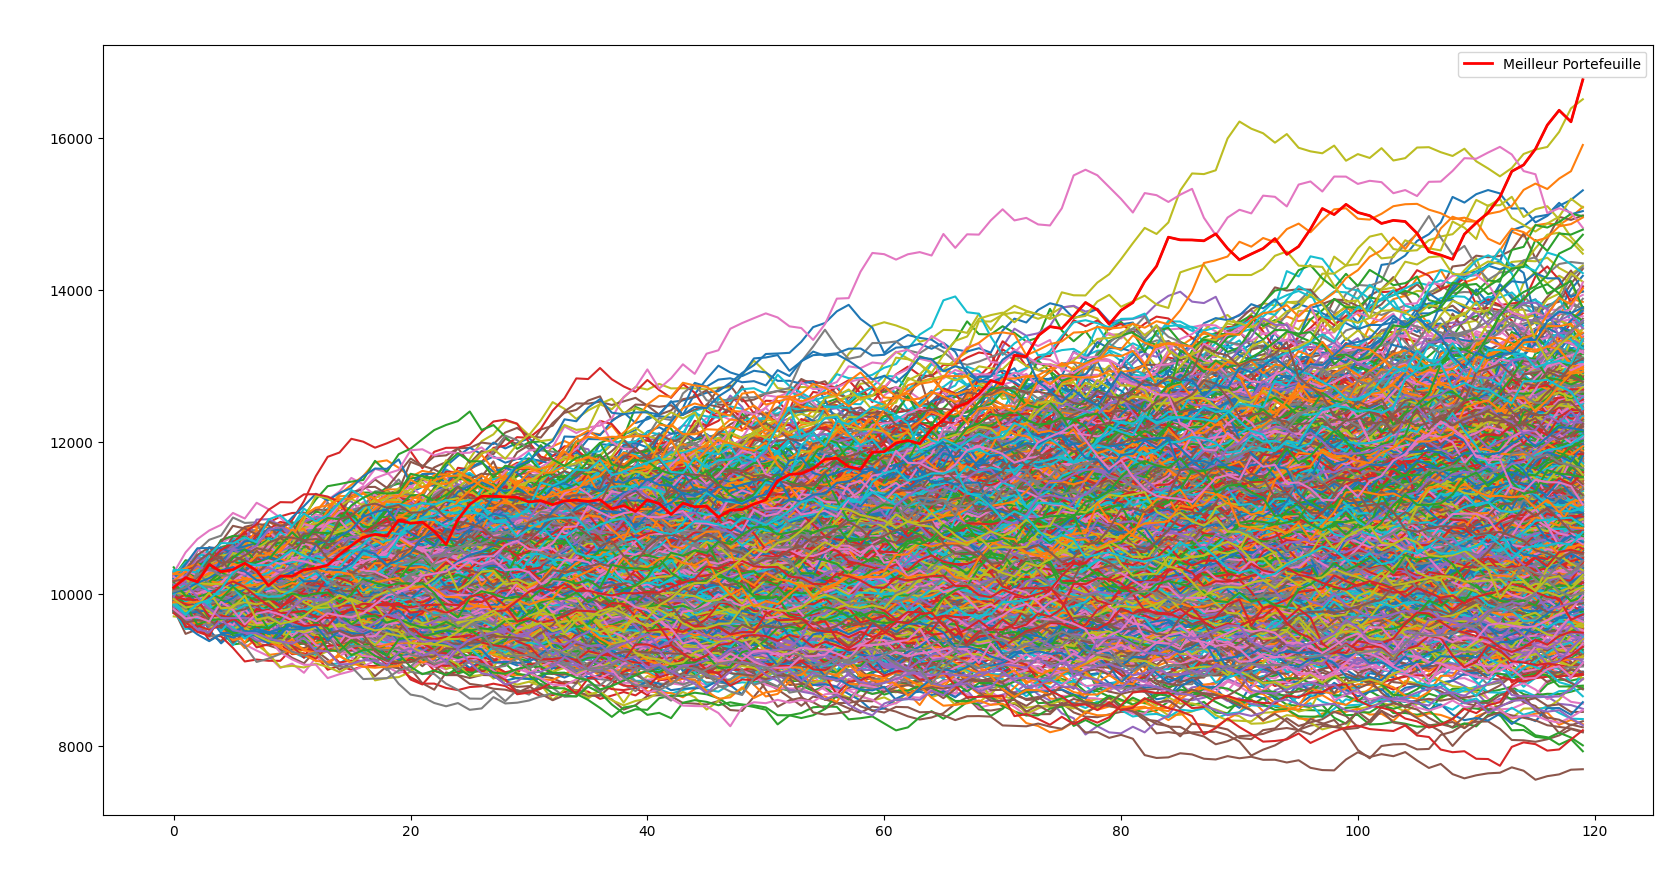

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fonction pour obtenir les données
def obtenir_donnees(actions, debut, fin):
    donnees = yf.download(actions, start=debut, end=fin)['Adj Close']
    rendements = np.log(donnees / donnees.shift(1))
    rendements_moyens = rendements.mean()
    matrice_covariance = rendements.cov()
    return rendements_moyens, matrice_covariance

# Liste des actions
liste_actions = ["INTC", "GE", "KO", "CMCSA", "NFLX",
    "ADBE", "CSCO", "T", "ABT", "XOM",
    "CVX", "MRK", "ORCL", "PEP", "NKE",
    "ABBV", "TMO", "AMGN", "COST", "WFC",
    "META", "BRK-B", "JPM", "BAC", "WFC",
    "C", "INTC", "CVX", "XOM", "PFE", "OR.PA", "RMS.PA"]

actions = [action for action in liste_actions]

date_fin = "2023-09-01"
date_debut = "2022-09-01"

rendements_moyens, matrice_covariance = obtenir_donnees(actions, date_debut, date_fin)

poids = np.random.random(len(rendements_moyens))
poids /= np.sum(poids)

# Simulation de Monte Carlo
nombre_simulations = 1000  # Nombre de simulations
T = 120  # Période en jours

rendements_moyens_mat = np.full(shape=(T, len(poids)), fill_value=rendements_moyens)
rendements_moyens_mat = rendements_moyens_mat.T

portefeuille_simulations = np.full(shape=(T, nombre_simulations), fill_value=0.0)

investissement_initial = 10000

for m in range(0, nombre_simulations):
    Z = np.random.normal(size=(T, len(poids)))  # Variables aléatoires non corrélées
    L = np.linalg.cholesky(matrice_covariance)  # Décomposition de Cholesky en matrice triangulaire inférieure
    rendements_journaliers = rendements_moyens_mat + np.inner(L, Z)  # Rendements journaliers corrélés pour les actions individuelles
    portefeuille_simulations[:, m] = np.cumprod(np.inner(poids, rendements_journaliers.T) + 1) * investissement_initial

# Calculer les rendements finaux de toutes les simulations
rendements_finaux = (portefeuille_simulations[-1, :] - investissement_initial) / investissement_initial

# Trouver l'indice de la simulation avec le meilleur rendement final
indice_meilleur_rendement = np.argmax(rendements_finaux)

# Extraire les détails du portefeuille pour la simulation avec le meilleur rendement
meilleur_portefeuille = portefeuille_simulations[:, indice_meilleur_rendement]

# Premier graphique avec matplotlib
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 25,
        }
plt.figure(figsize=(20, 10))
plt.plot(portefeuille_simulations)
plt.plot(meilleur_portefeuille, color='red', linewidth=2, label='Meilleur Portefeuille')
plt.ylabel('Valeur du Portefeuille ($)', fontdict=font)
plt.xlabel('Jours', fontdict=font)
plt.title('Simulation de Monte Carlo d\'un portefeuille d\'actions', fontdict=font)
plt.legend()
plt.show()

In [2]:
# Afficher les détails du portefeuille avec le meilleur rendement
print("Détails du portefeuille avec le meilleur rendement :")
print(f"Rendement final : {rendements_finaux[indice_meilleur_rendement]*100:.2f}%")
print(f"Valeur finale : {meilleur_portefeuille[-1]:.2f}$")
print(f"Investissement initial : {investissement_initial:.2f}$")


Détails du portefeuille avec le meilleur rendement :
Rendement final : 67.63%
Valeur finale : 16762.54$
Investissement initial : 10000.00$
